In [3]:
import pandas as pd 
import numpy as np
import os
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression

In [4]:
house = "Resources/Final_rent_homevalue.csv"

In [5]:
house = pd.read_csv(house, encoding = "ISO-8859-1")

In [6]:
house.head()


,zipcode,primarycity,city,date,rent,latitude,longitude,county,year,month,homevalue
0,91710,Chino,"Riverside, CA",2014-01-01,"$1,810.00",34.00,-117.68,San Bernardino County,2014,1,"$393,085.00"
1,28078,Huntersville,"Charlotte, NC",2014-01-01,"$1,205.00",35.41,-80.84,Mecklenburg County,2014,1,"$252,566.00"
2,89074,Henderson,"Las Vegas, NV",2014-01-01,"$1,040.00",36.03,-115.07,Clark County,2014,1,"$216,309.00"
3,20910,Silver Spring,"Washington, DC",2014-01-01,"$1,830.00",39.00,-77.04,Montgomery County,2014,1,"$541,022.00"
4,55104,Saint Paul,"Minneapolis-St Paul, MN",2014-01-01,"$1,087.00",44.95,-93.16,Ramsey County,2014,1,"$190,597.00"


In [7]:
house["rent"] = house["rent"].str.replace("$", "")
house["rent"] = house["rent"].str.replace(",", "")
house["rent"] = house["rent"].astype(float)


/var/folders/mt/t33nk5_d1nn6j4wfq6p3l3340000gn/T/ipykernel_2416/830307489.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  house["rent"] = house["rent"].str.replace("$", "")


In [8]:
house.columns

Index(['zipcode', 'primarycity', 'city', 'date', 'rent', 'latitude',
       'longitude', 'county', 'year', 'month', 'homevalue'],
      dtype='object')

In [9]:
house["homevalue"] = house["homevalue"].str.replace("$", "")
house["homevalue"] = house["homevalue"].str.replace(",", "")
house["homevalue"] = house["homevalue"].astype(float)

/var/folders/mt/t33nk5_d1nn6j4wfq6p3l3340000gn/T/ipykernel_2416/2662781593.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  house["homevalue"] = house["homevalue"].str.replace("$", "")


In [10]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216608 entries, 0 to 216607
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   zipcode      216608 non-null  int64  
 1   primarycity  216608 non-null  object 
 2   city         216608 non-null  object 
 3   date         216608 non-null  object 
 4   rent         216608 non-null  float64
 5   latitude     216608 non-null  float64
 6   longitude    216608 non-null  float64
 7   county       216509 non-null  object 
 8   year         216608 non-null  int64  
 9   month        216608 non-null  int64  
 10  homevalue    216608 non-null  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 18.2+ MB


In [11]:
house.describe()

,zipcode,rent,latitude,longitude,year,month,homevalue
count,216608.000000,216608.000000,216608.000000,216608.000000,216608.000000,216608.000000,2.166080e+05
mean,54924.910830,1667.264381,35.505987,-94.443329,2017.683437,6.377553,4.384376e+05
std,30846.015989,835.472886,5.351203,17.671219,2.361714,3.479039,4.043536e+05
min,1604.000000,84.000000,21.270000,-158.080000,2014.000000,1.000000,1.943100e+04
25%,30022.000000,1215.000000,32.790000,-112.310000,2016.000000,3.000000,2.112858e+05
50%,48326.000000,1503.000000,34.300000,-87.620000,2018.000000,6.000000,3.163100e+05
75%,85653.000000,1937.000000,39.690000,-80.200000,2020.000000,9.000000,5.126048e+05
max,99206.000000,30255.000000,48.180000,-70.660000,2022.000000,12.000000,5.990842e+06


In [12]:
housevalue = house["rent"]
box_df = house.pivot(columns='year',values='rent')
box_dict =[ v.dropna() for k,v in box_df.iterrows() ]
box_dict


[year
 2014    1810.0
 Name: 0, dtype: float64,
 year
 2014    1205.0
 Name: 1, dtype: float64,
 year
 2014    1040.0
 Name: 2, dtype: float64,
 year
 2014    1830.0
 Name: 3, dtype: float64,
 year
 2014    1087.0
 Name: 4, dtype: float64,
 year
 2014    1218.0
 Name: 5, dtype: float64,
 year
 2014    1157.0
 Name: 6, dtype: float64,
 year
 2014    2251.0
 Name: 7, dtype: float64,
 year
 2014    1235.0
 Name: 8, dtype: float64,
 year
 2014    2688.0
 Name: 9, dtype: float64,
 year
 2014    1179.0
 Name: 10, dtype: float64,
 year
 2014    972.0
 Name: 11, dtype: float64,
 year
 2014    666.0
 Name: 12, dtype: float64,
 year
 2014    1321.0
 Name: 13, dtype: float64,
 year
 2014    2137.0
 Name: 14, dtype: float64,
 year
 2014    1152.0
 Name: 15, dtype: float64,
 year
 2014    1698.0
 Name: 16, dtype: float64,
 year
 2014    1554.0
 Name: 17, dtype: float64,
 year
 2014    1235.0
 Name: 18, dtype: float64,
 year
 2014    1604.0
 Name: 19, dtype: float64,
 year
 2014    1198.0
 Name: 20,

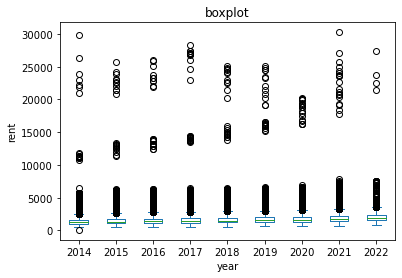

In [13]:
import matplotlib.pyplot as plt

ax = box_df[[2014,2015,2016,2017,2018,2019,2020,2021,2022]].plot(kind='box', title='boxplot')
# plt.boxplot(box_df.year, box_df.rent)
plt.xlabel('year')
plt.ylabel('rent')
plt.show()

In [14]:
print(box_df)

year      2014  2015  2016  2017    2018  2019  2020  2021  2022
0       1810.0   NaN   NaN   NaN     NaN   NaN   NaN   NaN   NaN
1       1205.0   NaN   NaN   NaN     NaN   NaN   NaN   NaN   NaN
2       1040.0   NaN   NaN   NaN     NaN   NaN   NaN   NaN   NaN
3       1830.0   NaN   NaN   NaN     NaN   NaN   NaN   NaN   NaN
4       1087.0   NaN   NaN   NaN     NaN   NaN   NaN   NaN   NaN
...        ...   ...   ...   ...     ...   ...   ...   ...   ...
216603     NaN   NaN   NaN   NaN  2094.0   NaN   NaN   NaN   NaN
216604     NaN   NaN   NaN   NaN  1372.0   NaN   NaN   NaN   NaN
216605     NaN   NaN   NaN   NaN  2516.0   NaN   NaN   NaN   NaN
216606     NaN   NaN   NaN   NaN  1321.0   NaN   NaN   NaN   NaN
216607     NaN   NaN   NaN   NaN  1381.0   NaN   NaN   NaN   NaN

[216608 rows x 9 columns]


In [15]:
# Create our features
X = house.drop(columns=["rent","primarycity","city", "county","date"])
X = pd.get_dummies(X)


# Create our target
y = house["rent"]

In [16]:
X.describe()

,zipcode,latitude,longitude,year,month,homevalue
count,216608.000000,216608.000000,216608.000000,216608.000000,216608.000000,2.166080e+05
mean,54924.910830,35.505987,-94.443329,2017.683437,6.377553,4.384376e+05
std,30846.015989,5.351203,17.671219,2.361714,3.479039,4.043536e+05
min,1604.000000,21.270000,-158.080000,2014.000000,1.000000,1.943100e+04
25%,30022.000000,32.790000,-112.310000,2016.000000,3.000000,2.112858e+05
50%,48326.000000,34.300000,-87.620000,2018.000000,6.000000,3.163100e+05
75%,85653.000000,39.690000,-80.200000,2020.000000,9.000000,5.126048e+05
max,99206.000000,48.180000,-70.660000,2022.000000,12.000000,5.990842e+06


[0.00150232]
1009.4886307412467


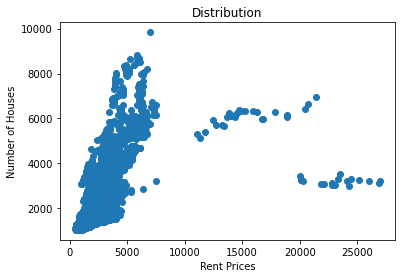

In [59]:
x = house[['homevalue']]

y = house['rent']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


print(model.coef_)

print(model.intercept_)

plt.title("Distribution")
plt.xlabel("Rent Prices")
plt.ylabel("Number of Houses")

plt.scatter(y_test, y_pred)


In [60]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
r2_score = regressor.score(X_test,y_test)
print(r2_score*100,'%')

55.69734318401656 %
